In [1]:
#Import libraries
import requests
import pandas as pd
import math
from collections import defaultdict
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#API Setup
API_KEY = "6265893adb624ecfa13d228653061eba"  
BASE_URL = "https://api.football-data.org/v4/competitions/PL/matches?season=2024"

headers = {"X-Auth-Token": API_KEY}
response = requests.get(BASE_URL, headers=headers)
data = response.json()

if "matches" not in data:
    raise ValueError("No 'matches' found in API response. Check your API key or season.")

matches = data["matches"]
print(f"✅ Retrieved {len(matches)} total matches from the API")


✅ Retrieved 380 total matches from the API


In [3]:
#Filter finished matches
finished_matches = [m for m in matches if m.get("status") == "FINISHED"]
print(f"✅ Found {len(finished_matches)} finished matches")


✅ Found 380 finished matches


In [4]:
#Count wins per team
win_counts = defaultdict(int)

for match in finished_matches:
    home_team = match["homeTeam"]["name"]
    away_team = match["awayTeam"]["name"]
    home_score = match["score"]["fullTime"]["home"]
    away_score = match["score"]["fullTime"]["away"]

    if home_score > away_score:
        win_counts[home_team] += 1
    elif away_score > home_score:
        win_counts[away_team] += 1
    # draws not counted

print(f"✅ Counted wins for {len(win_counts)} teams")


✅ Counted wins for 20 teams


In [5]:
#Define win probability function
def win_probability(k, n=38):
    if n == 0:
        return 0
    p = k / n
    return math.comb(n, k) * (p ** k) * ((1 - p) ** (n - k))


In [6]:
#Build dataframe
summary_df = pd.DataFrame.from_dict(win_counts, orient="index", columns=["wins"]).reset_index()
summary_df.columns = ["team", "wins"]
summary_df["win_probability"] = summary_df["wins"].apply(lambda k: win_probability(k, 38))

#Sort by wins
summary_df = summary_df.sort_values(by="wins", ascending=False).reset_index(drop=True)
summary_df


,team,wins,win_probability
0,Liverpool FC,25,0.135388
1,Manchester City FC,21,0.129291
2,Newcastle United FC,20,0.128761
3,Arsenal FC,20,0.128761
4,Chelsea FC,20,0.128761
5,Aston Villa FC,19,0.128585
6,Nottingham Forest FC,19,0.128585
7,Brighton & Hove Albion FC,16,0.130190
8,Brentford FC,16,0.130190
9,AFC Bournemouth,15,0.131480


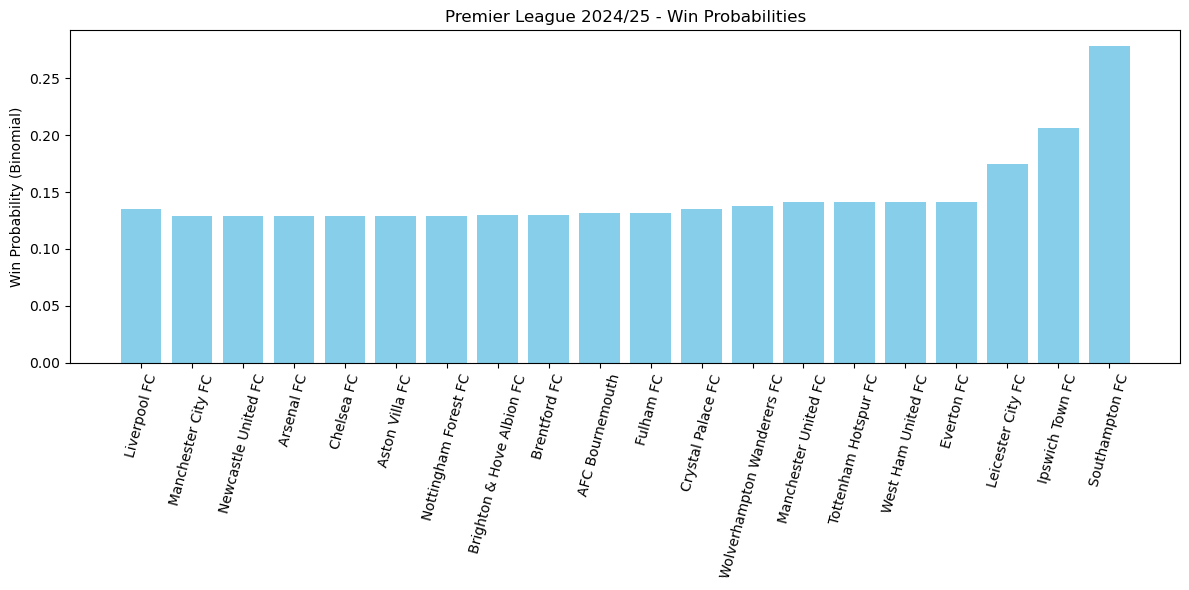

In [7]:
#Visualization
plt.figure(figsize=(12,6))
plt.bar(summary_df["team"], summary_df["win_probability"], color="skyblue")
plt.xticks(rotation=75)
plt.ylabel("Win Probability (Binomial)")
plt.title("Premier League 2024/25 - Win Probabilities")
plt.tight_layout()
plt.show()
